In [1]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model evaluation
Accuray is  0 3
 classification_report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.25      0.20      0.22         5

    accuracy                           0.12         8
   macro avg       0.12      0.10      0.11         8
weighted avg       0.16      0.12      0.14         8


 Top 5 team to win ucl
               Team  Win_Probability
31        Liverpool          0.98500
35         Juventus          0.96250
26      Real Madrid          0.63250
30              PSG          0.55325
29        Barcelona          0.54925
34  Atletico Madrid          0.35250
32          Chelsea          0.34000
33      Inter Milan          0.31000
28  Manchester City          0.30500
27    Bayern Munich          0.23325


Text(0, 0.5, 'Team')

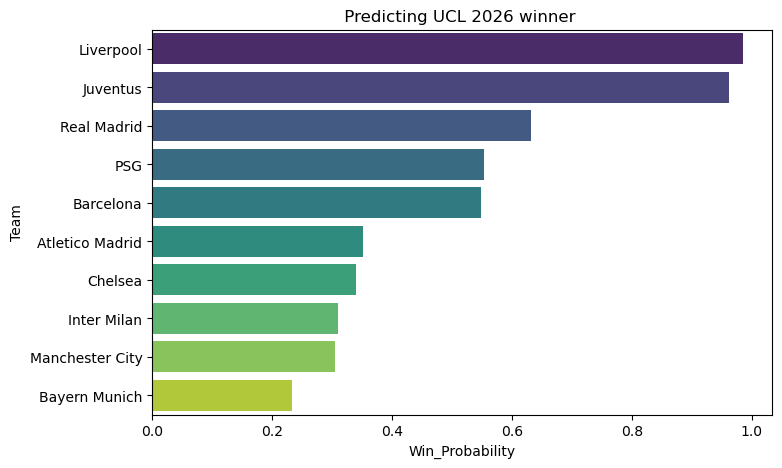

In [2]:
#STEP 1: Load the dataset
df=pd.read_csv("ucl_data.csv")  # Make sure 'ucl_data.csv' is in the same folder
#STEP 2: Select features and target variable
X=df[["Goals_For", "League_Strength","Runner_Code"]]
y=df["Winner"]
#STEP 3: Split the dataset into training and testing sets
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=42)
#STEP 4: Initialize and train the Random Forest model
model=RandomForestClassifier(n_estimators=200,random_state=42)
model.fit(X_train,y_train)
#STEP 5: Evaluate the model on the test data
y_pred=model.predict(X_test)
print("model evaluation")
print("Accuray is ", round(accuracy_score(y_pred,y_test)),3)
print(" classification_report:\n", classification_report(y_pred,y_test))
#STEP 6: Predict probabilities for UCL 2026 teams
ucl_2026=df[df["Year"]==2026].copy()
ucl_2026["Win_Probability"]=model.predict_proba(ucl_2026[["Goals_For","League_Strength","Runner_Code"]])[:,1]
# Sort teams by their win probability (highest first)
ucl_2026=ucl_2026.sort_values("Win_Probability",ascending=False)
print("\n Top 5 team to win ucl")
print(ucl_2026[["Team", "Win_Probability"]])
# STEP 7 Visualize the results using a bar chart
plt.figure(figsize=(8,5)),
sns.barplot(x=ucl_2026["Win_Probability"], y=ucl_2026["Team"], hue=ucl_2026["Team"], legend=False,palette="viridis")
plt.title(" Predicting UCL 2026 winner  ")
plt.xlabel("Win_Probability")
plt.ylabel("Team")
